In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

# visualization

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install seaborn 
import seaborn as sns

You are using pip version 8.0.2, however version 8.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [21]:
# Read `yelp.csv` into a DataFrame
df = pd.read_csv('data/yelp.csv', index_col=0)
df.head()

,date,review_id,stars,text,type,user_id,cool,useful,funny
business_id,,,,,,,,,
9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


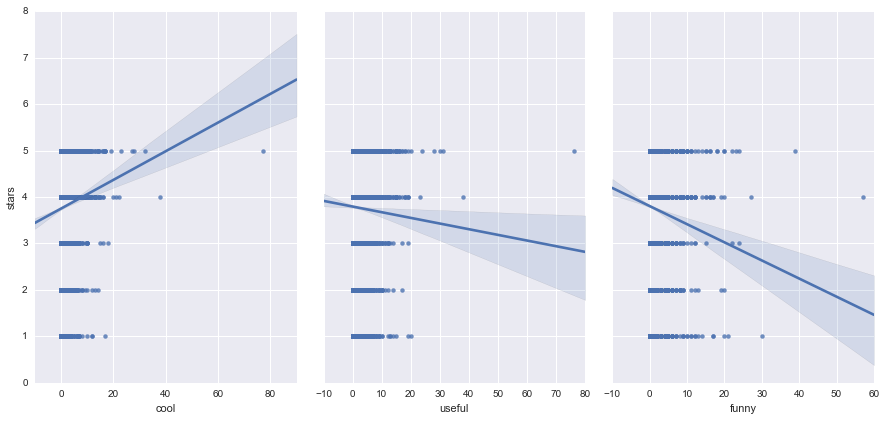

In [4]:
#Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars

# Plot a scatter plot and  include a "regression line"
sns.pairplot(df, x_vars=['cool','useful','funny'], y_vars='stars', size=6, aspect=0.7, kind='reg')


In [20]:
#Define cool/useful/funny as the features, and stars as the response.


# create X and y
feature_cols = ['cool','useful','funny']
X = df[feature_cols]
y = df.stars



In [10]:
#Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? 
#Explore the Yelp website to see if you detect similar trends.
# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_


3.83989479278
[ 0.27435947 -0.14745239 -0.13567449]


In [39]:
#Fit a linear regression model and interpret the coefficients. 



### Using  STATSMODELS ###

# create a fitted model
lm = smf.ols(formula='stars ~ cool', df=df).fit()

# print the coefficients
lm.params

#print r-Squared
lm.rsquared


#Do the coefficients make intuitive sense to you? 


TypeError: from_formula() takes at least 3 arguments (2 given)

In [12]:
# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)


[('cool', 0.27435946858853061),
 ('useful', -0.14745239099401478),
 ('funny', -0.13567449053706179)]

In [13]:

### SCIKIT-LEARN ###

# calculate the R-squared value for the model

y_pred = linreg.predict(X)
R_squared = metrics.r2_score(y, y_pred)

print R_squared

0.044272856242


In [14]:
#Evaluate the model by splitting it into training and testing sets and computing the RMSE.

#Does the RMSE make intuitive sense to you?

# define a function that accepts X and y and computes testing RMSE
def train_test_rmse(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))


In [15]:
feature_cols = ['cool','useful','funny']
X = df[feature_cols]
train_test_rmse(X, y)

1.184290528216591

In [16]:
feature_cols = ['cool','useful']
X = df[feature_cols]
train_test_rmse(X, y)

1.1962390876092979

In [17]:
feature_cols = ['useful','funny']
X = df[feature_cols]
train_test_rmse(X, y)

1.2098272023900722

In [18]:
feature_cols = ['cool','funny']
X = df[feature_cols]
train_test_rmse(X, y)

1.1942673256493732

In [19]:
#Try removing some of the features and see if the RMSE improves.

#this is the best RMSE

feature_cols = ['cool','useful','funny']
X = df[feature_cols]
train_test_rmse(X, y)


1.184290528216591

In [35]:

##Bonus: 

#Think of some new features you could create from the existing data that might
#be predictive of the response. (This is called "feature engineering".) 
#Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.


# create a feature and  it cu for COOL & Funny 

c = df['cool']
u = df ['useful']
cu = c+u



X = df[feature_cols],
train_test_rmse(X, y)






business_id
9yKzy9PApeiPPOUJEtnvkg     7
ZRJwVLyzEJq1VAihDhYiow     0
6oRAC4uyJCsJl1X0WZpVSA     1
_1QQZuf4zZOyFCvXc0o6Vg     3
6ozycU1RpktNG2-1BroVtw     0
-yxfBYGB6SEqszmxJxd97A     7
zp713qNhx8d9KCJJnrw1xA    14
hW0Ne_HTHEAgGF1rAdmR-g     1
wNUea3IXZWD63bbOQaOH-g     0
nMHhuYan8e3cONo3PornJA     1
AsSCv0q_BWqIe3mX2JqsOQ     4
e9nN4XxjdHj4qtKCOPq_vg     2
h53YuCiIDfEFSJCQpk8v1g     3
WGNIYMeXPyoWav1APUq7jA     3
yc5AH9H71xJidA_J2mChLA     2
Vb9FPCEL6Ly24PNxLBaAFw     2
supigcPNO9IKo6olaTNV-g     7
O510Re68mOy9dU490JTKCg     0
b5cEoKR8iQliq-yT2_O0LQ    11
4JzzbSbK9wmlOBJZWYfuCg     2
8FNO4D3eozpIjj0k3q5Zbg     6
tdcjXyFLMKAsvRhURNOkCg     2
eFA9dqXT5EA_TrMgbo03QQ     0
IJ0o6b8bJFAbG6MjGfBebQ     1
JhupPnWfNlMJivnWB5druA     1
wzP2yNpV5p04nh0injjymA     0
qjmCVYkwP-HDa35jwYucbQ     0
wct7rZKyZqZftzmAU-vhWQ     6
vz2zQQSjy-NnnKLZzjjoxA     2
i213sY5rhkfCO8cD-FPr1A     1
                          ..
R6aazv8FB-6BeanY3ag8kw     0
JOZqBKIOB8WEBAWm7v1JFA     3
OllL0G9Kh_k1lx-2vrFDXQ     0
XH

In [ ]:
#**Bonus:** Compare your best RMSE on testing set with 
#the RMSE for the "null model", which is the model that ignores 
#all features and simply predicts the mean rating in the training set for all observations in the testing set.



In [ ]:
#**Bonus:** Instead of treating this as a regression problem, 
# treat it as a classification problem and see what testing accuracy you can achieve with KNN.
    
    
    